In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
from seaborn import heatmap
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

In [113]:
df = pd.read_csv('prices.txt', engine='python', sep='   ', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
1,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
2,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
3,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
4,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,10.32,63.28,45.54,43.35,52.64,7.91,17.30,55.30,67.83,58.73,...,28.81,79.78,10.85,61.76,30.12,48.51,82.09,34.95,35.80,52.57
746,10.32,63.34,45.56,43.28,52.73,7.87,17.26,54.92,67.95,58.62,...,28.78,80.46,10.77,61.49,29.85,48.40,81.43,34.99,35.58,53.10
747,10.32,63.23,45.55,43.25,52.66,7.83,17.32,54.67,67.94,59.15,...,28.73,81.15,10.75,60.36,29.77,48.41,81.90,35.00,35.45,53.21
748,10.20,63.12,45.56,43.19,52.51,7.71,17.33,55.18,67.99,59.64,...,28.73,82.22,10.81,59.24,29.61,48.42,81.33,35.19,35.57,53.01


In [128]:
stock = 1

Y_train = df[stock].shift(-1).dropna()

X_train = df.iloc[:-1, df.columns]
X_train = sm.add_constant(X_train)

model = sm.OLS(endog=Y_train, exog=X_train).fit()

test = df.iloc[0]
test = sm.add_constant([test], has_constant='add')
model.predict(exog=test)

array([72.02766675])

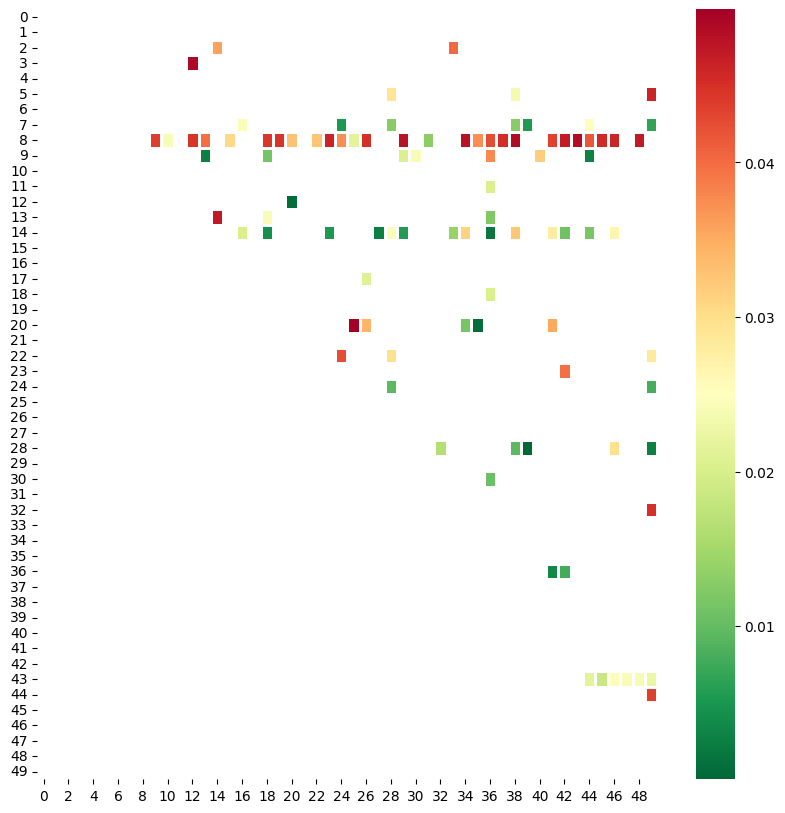

In [60]:
def find_cointegrated_pairs(data: pd.DataFrame, significance=0.05):
    nInst = data.shape[1]
    score_matrix = np.zeros((nInst, nInst))
    pvalue_matrix = np.ones((nInst, nInst))
    keys = data.keys()
    pairs = []
    for i in range(nInst):
        for j in range(i+1, nInst):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

pvalue_matrix, pairs = find_cointegrated_pairs(df)

fig = plt.figure(figsize=(10,10))
heatmap(pvalue_matrix, cmap='RdYlGn_r', mask=(pvalue_matrix > 0.05), linewidths=1)
plt.show()
plt.close(fig)